In [ ]:
import torch
import torch.nn as nn 
import torchvision
import torch.optim as optim 

BATCH_SIZE = 100
NUMBER = 2 
KERNEL_SIZE = 5 
STRIDE = 1
N_EPOCHS = 10 

Transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0,), (128,)),]) 

training = torchvision.datasets.MNIST("./data", train = True, download = True, transform = Transform)
testing = torchvision.datasets.MNIST("./data", train = True, download = True, transform = Transform) 

trainingLoader = torch.utils.data.DataLoader(training, shuffle = True, batch_size = BATCH_SIZE) 
testingLoader = torch.utils.data.DataLoader(testing, shuffle = True, batch_size = BATCH_SIZE)

class C_Network_Lenet(nn.Module):
    def __init__(self, stride=STRIDE, args=None):
        super(C_Network_Lenet, self).__init__() 
        self.args = args
        
        self.layers = nn.ModuleList([]) 

        conv_layer = nn.Conv2d(1, 6, kernel_size=KERNEL_SIZE, stride=STRIDE, padding=NUMBER)
        self.layers.append(conv_layer)

        #self.layers.append(nn.Conv2d(1,6,kernel_size = KERNEL_SIZE, stride = STRIDE, padding = NUMBER))
        
        self.layers.append(nn.Tanh()) 
        self.layers.append(nn.MaxPool2d(kernel_size = NUMBER, stride = NUMBER)) 

        self.layers.append(nn.Conv2d(6,16,kernel_size = KERNEL_SIZE, stride = STRIDE, padding = 0)) 
        self.layers.append(nn.Tanh()) 
        self.layers.append(nn.MaxPool2d(kernel_size = NUMBER, stride = NUMBER)) 

        self.layers.append(nn.Conv2d(16,120,kernel_size = KERNEL_SIZE, stride = STRIDE, padding = 0)) 
        self.layers.append(nn.Tanh()) 

        self.layers.append(nn.Flatten()) 
        self.layers.append(nn.Linear(1*1*120, 84)) 
        self.layers.append(nn.Tanh()) 
        self.layers.append(nn.Linear(84,10))

    def forward(self, x):
        out = x
        for layer in self.layers:
            out = layer(out)
        return out


model = C_Network_Lenet() 
optimizer = optim.Adam(model.parameters()) 
loss_fn = nn.CrossEntropyLoss() 

n_epochs = N_EPOCHS
for epoch in range(N_EPOCHS):
    model.train() 
    for X_batch, y_batch in trainingLoader:
        y_pred = model(X_batch) 
        loss = loss_fn(y_pred, y_batch) 
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step() 
    model.eval() 
    acc = 0 
    count = 0 
    for X_batch, y_batch in testingLoader:
        y_pred = model(X_batch)
        acc += (torch.argmax(y_pred, 1) == y_batch).float().sum() 
        count += len(y_batch) 
    acc = acc / count 
    print("[INFO] Epoch %d: Model accuracy %.2f%%" % (epoch, acc*100))








[INFO] Epoch 0: Model accuracy 89.92%
[INFO] Epoch 1: Model accuracy 95.25%
[INFO] Epoch 2: Model accuracy 96.71%
[INFO] Epoch 3: Model accuracy 97.26%
[INFO] Epoch 4: Model accuracy 97.36%
[INFO] Epoch 5: Model accuracy 98.22%
[INFO] Epoch 6: Model accuracy 98.18%
[INFO] Epoch 7: Model accuracy 98.58%
[INFO] Epoch 8: Model accuracy 98.68%
[INFO] Epoch 9: Model accuracy 98.77%


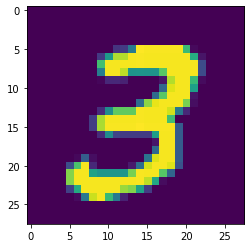

<ipython-input-69-fa52c5f0d084>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(training.data[7:8], dtype=torch.float32).permute(0, 2, 1)  # Shape [1, 28, 28]


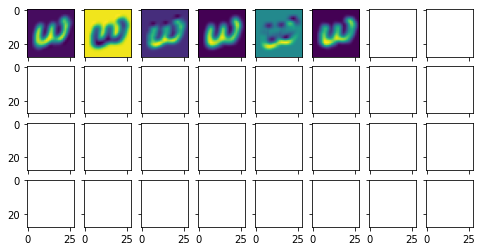

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(training.data[7])
plt.show()

X = torch.tensor(training.data[7:8], dtype=torch.float32).permute(0, 2, 1)  # Shape [1, 28, 28]
X = X.unsqueeze(0)  # Shape [1, 1, 28, 28]
model.eval()

with torch.no_grad():
    feature_maps = model.layers[0](X)
fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(8,4))
for i in range(0, feature_maps.shape[1]):
    if i >= 32:
        break
    row, col = i//8, i%8
    ax[row][col].imshow(feature_maps[0][i])
plt.show()






